<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week4/Assignment_Modul_Minggu4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [5]:
file_path = "spotify-2023.csv"

try:
    df_spotify = pd.read_csv(file_path, encoding="latin1")
except UnicodeDecodeError:
    df_spotify = pd.read_csv(file_path, encoding="ISO-8859-1")

df_spotify.info()
df_spotify.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Soal 1

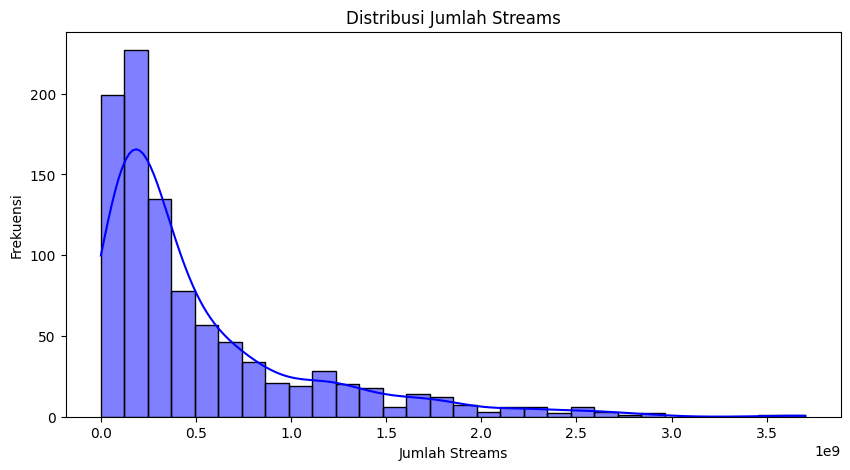

In [6]:
df_spotify["streams"] = pd.to_numeric(df_spotify["streams"], errors="coerce")
plt.figure(figsize=(10, 5))
sns.histplot(df_spotify["streams"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Streams")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Streams")
plt.show()

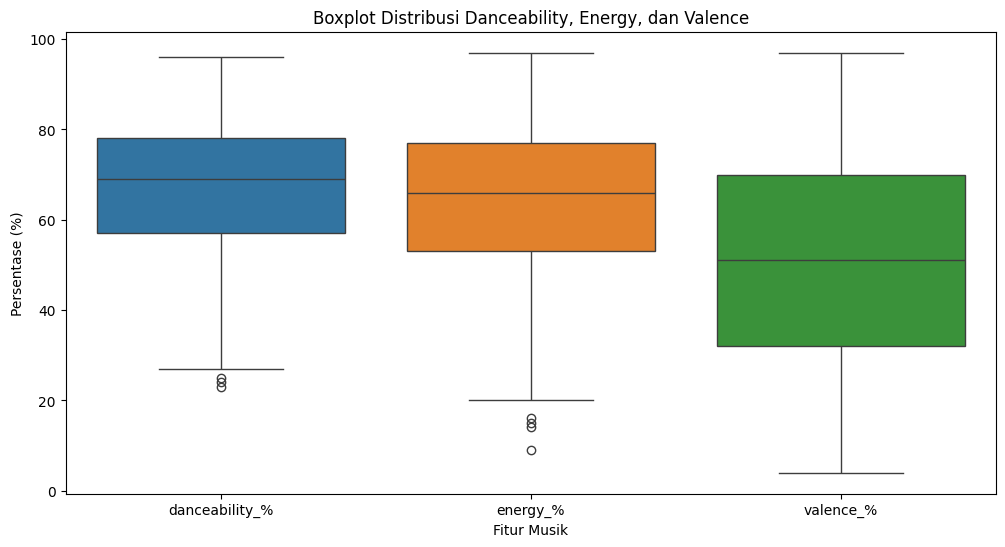

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_spotify[["danceability_%", "energy_%", "valence_%"]])
plt.xlabel("Fitur Musik")
plt.ylabel("Persentase (%)")
plt.title("Boxplot Distribusi Danceability, Energy, dan Valence")
plt.show()

Soal 2

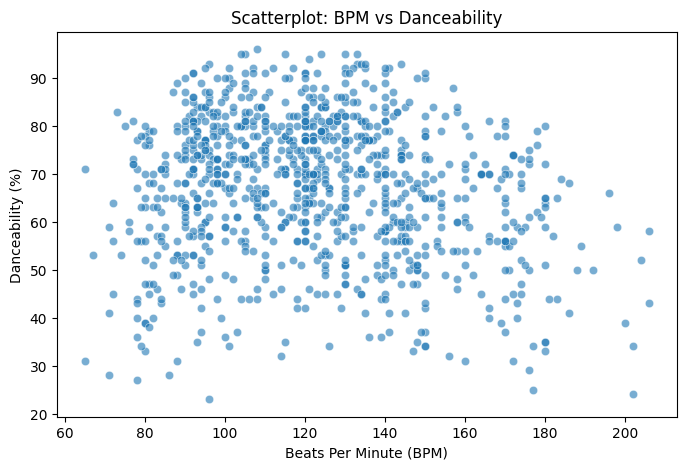

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_spotify["bpm"], y=df_spotify["danceability_%"], alpha=0.6)
plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Danceability (%)")
plt.title("Scatterplot: BPM vs Danceability")
plt.show()

In [9]:
correlation, p_value = pearsonr(df_spotify["bpm"], df_spotify["danceability_%"])
print(f"Korelasi Pearson: {correlation:.3f}, p-value: {p_value:.3e}")

Korelasi Pearson: -0.147, p-value: 5.121e-06


Soal3

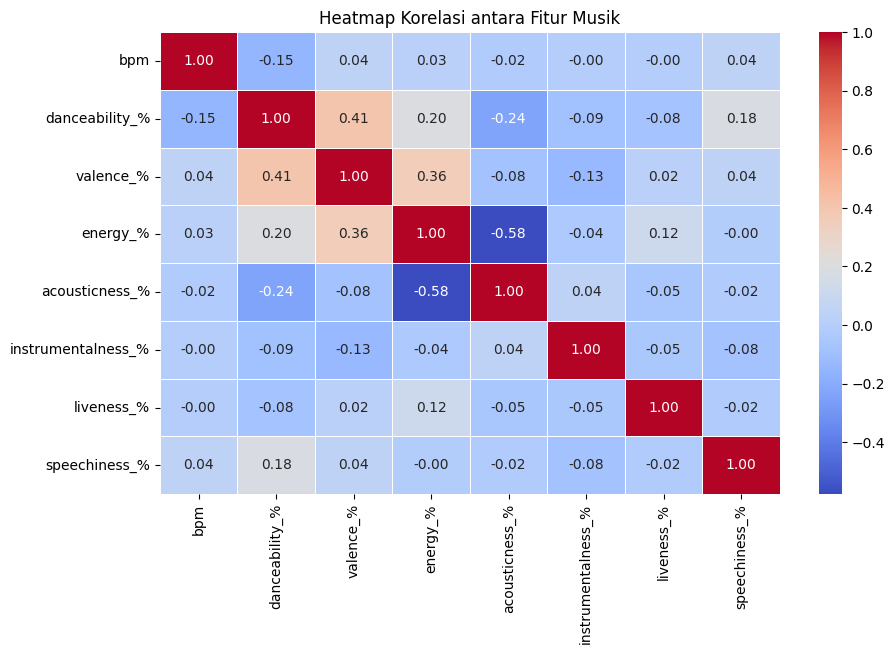

In [10]:
music_features = ["bpm", "danceability_%", "valence_%", "energy_%",
                  "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]

correlation_matrix = df_spotify[music_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antara Fitur Musik")
plt.show()

In [11]:
correlation_unstacked = correlation_matrix.unstack().sort_values()
highest_correlation = correlation_unstacked[correlation_unstacked < 1].idxmax()
lowest_correlation = correlation_unstacked.idxmin()

print(f"Korelasi tertinggi: {highest_correlation} -> {correlation_matrix.loc[highest_correlation]:.3f}")
print(f"Korelasi terendah: {lowest_correlation} -> {correlation_matrix.loc[lowest_correlation]:.3f}")

Korelasi tertinggi: ('valence_%', 'danceability_%') -> 0.408
Korelasi terendah: ('energy_%', 'acousticness_%') -> -0.577
